# Hypothesis Testing with Python 

## One Sample t-test

#### Import Packages 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import math

Matplotlib is building the font cache; this may take a moment.


### Goal : t-test checks whether a sample mean differs from a population mean. 
1. Lets check with random dummy data if the average age of voters in the entire country and the average age of sample of voters in Minnesota significantly differs.

In [4]:
np.random.seed(6)

population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))

minnesota_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
minnesota_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
minnesota_ages=np.concatenate((minnesota_ages1,minnesota_ages2))

In [5]:
print(population_ages.mean())
print(minnesota_ages.mean())

43.000112
39.26


### We perform t-test at 95% confidence level and see if it correctly rejects the null hypothesis

In [8]:
stats.ttest_1samp(a=minnesota_ages,                   #Sample data
                  popmean=population_ages.mean() #Pop mean
                   )

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)

#### The statistic "t" equals to -2.574 and hence the mean deviates from the null hypothesis 

In [9]:
stats.t.ppf(q=0.025,        #Quantile to check
            df=49
            
            )

-2.0095752371292397

In [10]:
stats.t.ppf(q=0.975,
            df=49)

2.0095752371292397

In [12]:
##THe p-value should correspond to what we have from our test
stats.t.cdf(x=-2.5742,
            df=49) *2

0.013121066545690117

In [13]:
sigma=minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                      #Confidence level
                 df=49,                     #Degrees of freedom
                 loc=minnesota_ages.mean(), #Sample mean
                 scale=sigma)               #Stabdard dev estimate 


(36.36966907692507, 42.150330923074925)

In [15]:
stats.t.interval(0.99,                      # 99% Confidence level
                 df=49,                     #Degrees of freedom
                 loc=minnesota_ages.mean(), #Sample mean
                 scale=sigma)               #Stabdard dev estimate 

#This does not give us enough evidence to reject null hypothesis

(35.40547994092107, 43.11452005907893)

In [16]:
import math

# Seed for reproducibility
np.random.seed(6)

# Generate data
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

# Population mean
population_mean = population_ages.mean()

# One-sample t-test
t_statistic, p_value = stats.ttest_1samp(a=minnesota_ages, popmean=population_mean)

# Calculate critical values
df = len(minnesota_ages) - 1
critical_value_95 = stats.t.ppf(0.975, df)
critical_value_99 = stats.t.ppf(0.995, df)

# Calculate manual p-value
p_value_manual = stats.t.cdf(t_statistic, df) * 2

# Standard error of the mean
sigma = minnesota_ages.std(ddof=1) / math.sqrt(len(minnesota_ages))

# Confidence intervals
confidence_interval_95 = stats.t.interval(0.95, df, loc=minnesota_ages.mean(), scale=sigma)
confidence_interval_99 = stats.t.interval(0.99, df, loc=minnesota_ages.mean(), scale=sigma)

# Outputs
print(f"t-statistic: {t_statistic}, p-value: {p_value}")
print(f"Manual p-value: {p_value_manual}")
print(f"Critical Value at 95%: {critical_value_95}")
print(f"Critical Value at 99%: {critical_value_99}")
print(f"95% Confidence Interval: {confidence_interval_95}")
print(f"99% Confidence Interval: {confidence_interval_99}")

if p_value < 0.05:
    print("Reject the null hypothesis at 95% confidence level.")
else:
    print("Fail to reject the null hypothesis at 95% confidence level.")

if p_value < 0.01:
    print("Reject the null hypothesis at 99% confidence level.")
else:
    print("Fail to reject the null hypothesis at 99% confidence level.")


t-statistic: -2.5742714883655027, p-value: 0.013118685425061678
Manual p-value: 0.013118685425061678
Critical Value at 95%: 2.0095752371292397
Critical Value at 99%: 2.67995197363155
95% Confidence Interval: (36.34032486345792, 42.17967513654207)
99% Confidence Interval: (35.36634675429388, 43.15365324570612)
Reject the null hypothesis at 95% confidence level.
Fail to reject the null hypothesis at 99% confidence level.


At 95% Confidence Level (
𝛼
=
0.05
α=0.05):

Why Different Conclusions?
The 99% confidence level requires stronger evidence (a smaller p-value) to reject the null hypothesis compared to the 95% confidence level. This is because the critical value is higher, making it more difficult to exceed.
The stricter criteria at the 99% confidence level protect against Type I errors (false positives) more stringently, leading to situations where you might reject the null hypothesis at 95% but not at 99%.

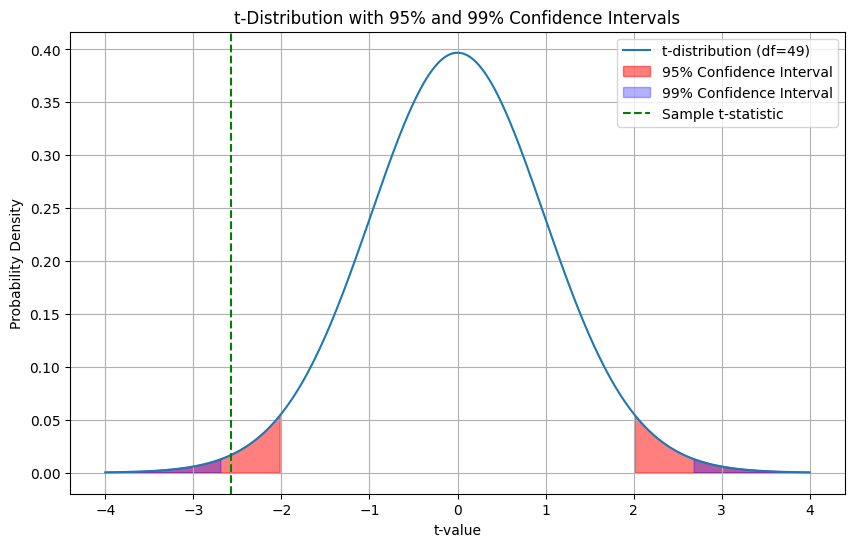

t-statistic: -2.5742714883655027
p-value: 0.013118685425061678
95% Confidence Interval: (36.34032486345792, 42.17967513654207)
99% Confidence Interval: (35.36634675429388, 43.15365324570612)


In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(6)

# Generate data
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

# Population mean
population_mean = population_ages.mean()

# Sample mean
sample_mean = minnesota_ages.mean()

# Standard error of the mean
sigma = minnesota_ages.std(ddof=1) / np.sqrt(len(minnesota_ages))

# Degrees of freedom
df = len(minnesota_ages) - 1

# t-statistic
t_statistic, p_value = stats.ttest_1samp(a=minnesota_ages, popmean=population_mean)

# Critical values
critical_value_95 = stats.t.ppf(0.975, df)
critical_value_99 = stats.t.ppf(0.995, df)

# Confidence intervals
confidence_interval_95 = stats.t.interval(0.95, df, loc=sample_mean, scale=sigma)
confidence_interval_99 = stats.t.interval(0.99, df, loc=sample_mean, scale=sigma)

# Plotting the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))

# Plot t-distribution
plt.plot(x, y, label='t-distribution (df=49)')

# Fill the 95% and 99% confidence intervals
plt.fill_between(x, y, where=((x > critical_value_95) | (x < -critical_value_95)), color='red', alpha=0.5, label='95% Confidence Interval')
plt.fill_between(x, y, where=((x > critical_value_99) | (x < -critical_value_99)), color='blue', alpha=0.3, label='99% Confidence Interval')

# Plot sample t-statistic
plt.axvline(x=t_statistic, color='green', linestyle='--', label='Sample t-statistic')

plt.title('t-Distribution with 95% and 99% Confidence Intervals')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the key results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
print(f"95% Confidence Interval: {confidence_interval_95}")
print(f"99% Confidence Interval: {confidence_interval_99}")


## Two sample t-test
1. It investigates whether the means of two independent data samples differ from one another.
2. The null hypothesis is that the means of both groups are the same 
3. Unlike one sample t-test where we test against a known population parameter, the two sample test only onvolves sample means 


In [18]:
np.random.seed(12)
wisconsin_ages1=stats.poisson.rvs(loc=18,mu=33,size=30)
wisconsin_ages2=stats.poisson.rvs(loc=18,mu=13,size=20) 
wisconsin_ages=np.concatenate((wisconsin_ages1,wisconsin_ages2));
print(wisconsin_ages.mean())

42.8


In [19]:
stats.ttest_ind(a=minnesota_ages,b=wisconsin_ages,equal_var=False) #Assume sample have equal variance 


TtestResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748, df=97.9724575497005)

At 95% confidence level, we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%

## Paired T-test
1. The basic two sample t-test is designed for testing the differences between two independent groups. 
2. In some cases, we might want to test differences between ** samples of the same group ** at different points in time 
3. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after the treatment. 
4. Hence, a paired t-test lets you check whether the means of samples from the same group differs
5. We use the stats.ttest_rel() function in scipy for this test

In [23]:
np.random.seed(1)

before=stats.norm.rvs(scale=30,loc=250,size=100)

after=before + stats.norm.rvs(scale=5,loc=-1.25,size=100)

weight_df=pd.DataFrame({
    "weight_before":before,
    "weight_after":after,
    "weight_change":after-before
})

weight_df.describe() #Check a summary of the data 




,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,251.817486,251.331459,-0.486026
std,26.688464,27.511190,4.683450
min,180.953839,180.550751,-13.424189
25%,231.585474,234.110498,-2.750050
50%,251.922217,252.540438,-0.066921
75%,269.122310,269.351788,2.465101
max,315.567262,325.270761,11.391629


In [24]:
stats.ttest_rel(a=before,b=after)

TtestResult(statistic=1.0377522844297216, pvalue=0.3019134274780533, df=99)

## Errors in Statistical test : Type I Error & Type II Error

### In Type I error, we reject the null hypothesis when it is actually true . This error is also called false-positive or a false-hit 
### Solution : Raising the confidence level(lower alpha value) can help to mitigate the chances of running into this error

### In Type II error, we fail to reject the null hypothesis when it is actually false. 
### Type II error is also known as "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error

### Lets finally investigate the errors with a plot 

Text(0, 0.02, 'Type 2 Error')

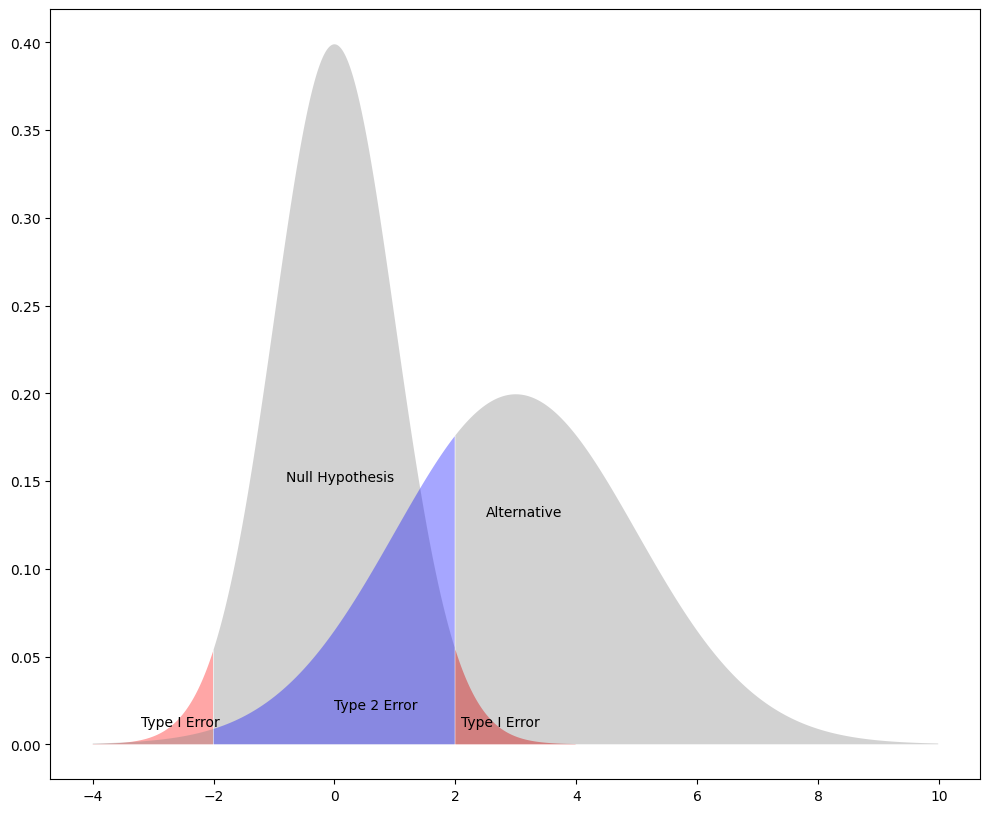

In [25]:
plt.figure(figsize=(12,10))
plt.fill_between(x=np.arange(-4,-2,0.01),y1=stats.norm.pdf(np.arange(-4,-2,0.01)),
                 facecolor='red',alpha=0.35
                 )
plt.fill_between(x=np.arange(-2,2,0.01),
                 y1=stats.norm.pdf(np.arange(-2,2,0.01)),
                 facecolor='grey',alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01),
                 y1=stats.norm.pdf(np.arange(2,4,0.01)),
                 facecolor='red',
                 alpha=0.5)
plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1=stats.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),
                 facecolor='grey',
                 alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01),
                 y1=stats.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),
                 facecolor='blue',
                 alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01),
                 y1=stats.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8,y=0.15,s="Null Hypothesis")
plt.text(x=2.5,y=0.13,s="Alternative")
plt.text(x=2.1,y=0.01,s="Type I Error")
plt.text(x=-3.2,y=0.01,s="Type I Error")
plt.text(x=0,y=0.02,s="Type 2 Error")

                 

                 

### To conclude, t-test is a powerful tool for investigating the differences between sample and population means. T-tests operate on numeric variables.